In [1]:
#importing all datasets from Zara and connecting them.
import numpy as np
import pandas as pd
zara1=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_1.csv',header=0,sep=',')
zara2=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_2.csv',header=0,sep=',')
zara3=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_3.csv',header=0,sep=',')
zara4=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_4.csv',header=0,sep=',')
zara5=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_5.csv',header=0,sep=',')
zara6=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_6.csv',header=0,sep=',')
zara7=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_7.csv',header=0,sep=',')
zara8=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_8.csv',header=0,sep=',')
zara9=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_9.csv',header=0,sep=',')
zara10=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_10.csv',header=0,sep=',')
zara11=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_11.csv',header=0,sep=',')
zara12=pd.read_csv('/Users/empathybroker/Documents/TimeSeries/zara_dataset/zara_dataset_en_US_17_12.csv',header=0,sep=',')


In [2]:
frames=[zara1,zara2,zara3,zara4,zara5,zara6,zara7,zara8,zara9,zara10,zara11,zara12]
zara=pd.concat(frames)
zara['date']=zara['date'].map(lambda x: x.rstrip('00:00:00+00:00'))
zara.dropna(axis=0,how='any',inplace=True)

In [3]:
del frames
del zara1,zara2,zara3,zara4,zara5,zara6,zara7,zara8,zara9,zara10,zara11,zara12

In [4]:
len(zara)

15027909

In [5]:
ref=zara.groupby('query').count().sort_values(['count'],ascending=False)
#there is no real need for this step, it is usefuk to look at the data we have as not all has
#completed time series. 

In [6]:
ref=ref[ref.index.map(len)>2] #dont want queries with fewer than 3 characters
ref=ref[ref['date']>367] #for time economy and also meaningful correlation, I choose complete time series

In [7]:
len(ref)

1031

In [6]:
zaraa=zara[zara['query']=='overalls'] #I used this on the for loop, so don't delete

In [7]:
zaraa=zaraa.rename(columns={'date':'ds','count':'y'})
zaraa['ds']=pd.to_datetime(zaraa['ds'])

In [8]:
import fbprophet
zaraa_prophet=fbprophet.Prophet(changepoint_prior_scale=0.05)
zaraa_prophet.fit(zaraa)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [9]:
zaraa_forecast=zaraa_prophet.make_future_dataframe(periods=60,freq='D')
zaraa_forecast=zaraa_prophet.predict(zaraa_forecast)

Text(0.5,1,'Searches over 2017 for OVERALLS')

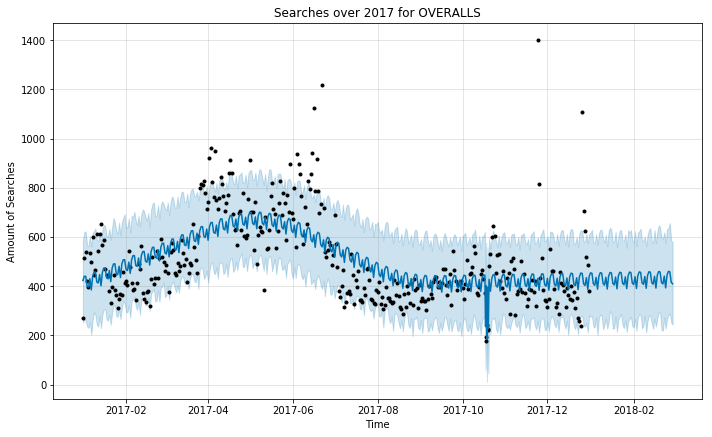

In [10]:
import matplotlib.pyplot as plt
zaraa_prophet.plot(zaraa_forecast,xlabel='Time',ylabel='Amount of Searches')
plt.title('Searches over 2017 for OVERALLS')

Text(0.5,1,'Overall, weekly and daily trends')

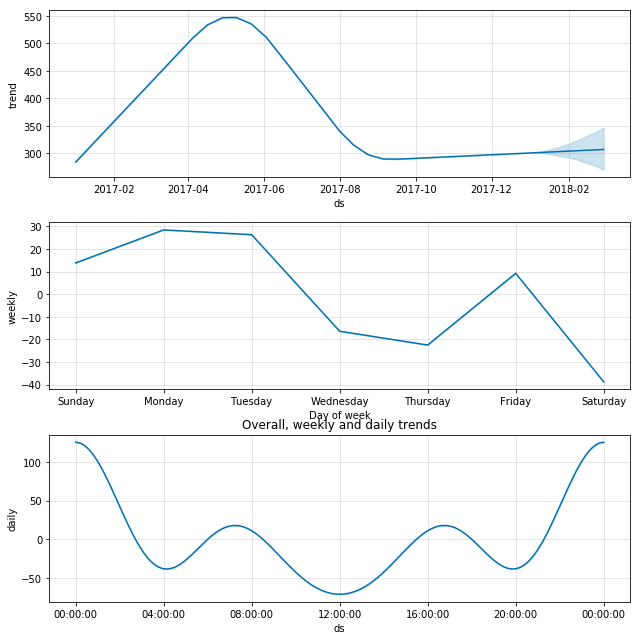

In [11]:
zaraa_prophet.plot_components(zaraa_forecast)
plt.title('Overall, weekly and daily trends')

In [14]:
#lets do the correlation dataframe:
#flato=zara[zara['query']=='flat over']

In [12]:
qlist=ref.index.tolist()

In [41]:
#qlist=qlist[:10]

In [59]:
#index=flato['ds'].tolist()
#corrdf=pd.DataFrame(index=index, columns=qlist)
#corrdf=corrdf.fillna(0)#to have 0 rather than NAN

In [60]:
#ref

In [13]:
df=pd.DataFrame()

In [14]:
df1=zara[zara['query']=='pumps']
#df2=zara[zara['query']=='culotte']
#df3=zara[zara['query']=='pipe']

In [204]:
#df1.drop('query',axis=1,inplace=True)
#df3.drop('query',axis=1,inplace=True)

/Users/empathybroker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/empathybroker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df['date']=df1['date']

In [61]:
#df=df.merge(df3,on='date',how='left')
#df

In [ ]:
correlations=pd.DataFrame()
correlations['date']=df['date']
c=0
for i in qlist:
    hits=zara[zara['query']==i]
    hits.drop('query',axis=1,inplace=True)
    correlations=correlations.merge(hits,on='date',how='left')
    c+=1
correlations.fillna(0) #instead of processing this just read off the csv, takes too long

In [24]:
correlations.set_index('date', inplace=True)
correlations.columns=qlist

In [26]:
corr_matrix=correlations.corr()

In [27]:
corr_matrix.to_csv("/Users/empathybroker/Documents/TimeSeries/zara_dataset/correlation_matrix.csv")

In [ ]:
#If we don't want to process this maybe better read from csv below

In [24]:
corr_matrix=pd.read_csv("/Users/empathybroker/Documents/TimeSeries/zara_dataset/correlation_matrix.csv")

In [ ]:
corr_matrix.set_index(corr_matrix.columns[0])

In [78]:
#DataFrame of the correlation matrix 
item1=[]
item2=[]
corr=[]
for i in corr_matrix.index:
    for j in corr_matrix.index:
        if i==j:
            pass
        elif corr_matrix[i][j]>0.9:
            item1.append(i)
            item2.append(j)
            corr.append(corr_matrix[i][j])
        

In [79]:
relation=pd.DataFrame()
relation['item1']=item1
relation['item2']=item2
relation['corr']=corr

In [ ]:
relation #maybe is interesting to relate these to Google correlate?

In [170]:
zaraa=zaraa.rename(columns={'ds':'date'})

In [173]:
flato.drop('query',axis=1,inplace=True)

/Users/empathybroker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
flato=flato.rename(columns={'ds':'date'})

In [181]:
df=df.merge(flato,on='date',how='left')

In [ ]:
correlations

In [229]:
len(qlist)

14987

In [231]:
newref=ref[ref['count']>367]

In [232]:
len(newref)

1031